In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [4]:
Base_Dados = pd.read_csv('/content/PS4_GamesSales.csv', encoding='latin-1')
#estava dando erro: 'utf-8' codec can't decode byte 0xca in position 22178: invalid continuation byte
#para resolver, foi inserido o encoding
Base_Dados.head(
)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [5]:
Base_Dados.shape

(1034, 9)

In [6]:
Base_Dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [7]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


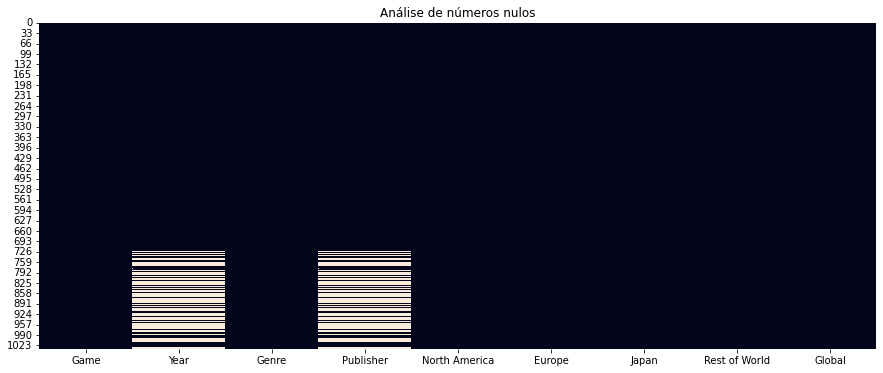

In [8]:
plt.figure(figsize=(15,6))
plt.title('Análise de números nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False);

In [9]:
#tais valores nulos não dá para substituir por média, mediana ou qualquer coisa;
#assim, serão retirados
Base_Dados.dropna(inplace=True)
#inplace ja vai inserir essa alteração no banco de dados, sem precisar subescrever

In [10]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 1030
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           825 non-null    object 
 1   Year           825 non-null    float64
 2   Genre          825 non-null    object 
 3   Publisher      825 non-null    object 
 4   North America  825 non-null    float64
 5   Europe         825 non-null    float64
 6   Japan          825 non-null    float64
 7   Rest of World  825 non-null    float64
 8   Global         825 non-null    float64
dtypes: float64(6), object(3)
memory usage: 64.5+ KB


In [11]:
Base_Dados.columns

Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')

In [12]:
#Estatísticas gerais
Base_Dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


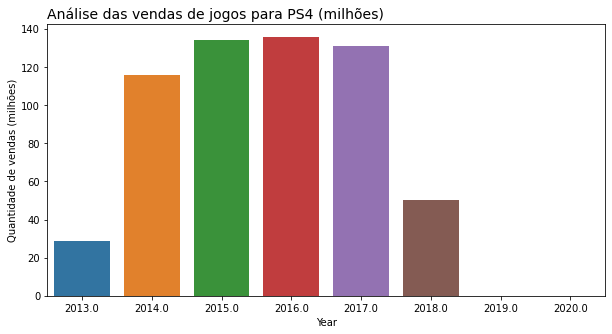

In [13]:
plt.figure(figsize=(10,5))
plt.title('Análise das vendas de jogos para PS4 (milhões)', fontsize=14, loc='left')

sns.barplot(data=Base_Dados, x='Year', y='Global', ci=None, estimator=sum) #estimator pode ser median, sum, mean, qualquer coisa
plt.ylabel('Quantidade de vendas (milhões)');

In [14]:
#talvez as vendas de 2019 e 2020, tenham sido retiradas no dropna.
#gráfico com barra, colorido e sem a barrinha preta

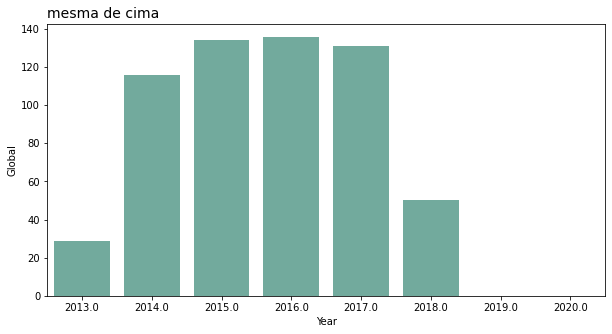

In [15]:
plt.figure(figsize=(10,5))
plt.title('mesma de cima', fontsize=14, loc='left')
sns.barplot(data=Base_Dados, x='Year', y='Global', color='#69b3a2', ci=None, estimator=sum); #color para deixar as cores padronizadas

In [16]:
#retirar os anos de 2019 e 2020 do dataset
#para isso usou o loc com o diferente (!=)
Base_Dados = Base_Dados.loc[(Base_Dados['Year'] != 2019) & (Base_Dados['Year'] != 2020)]

In [17]:
Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


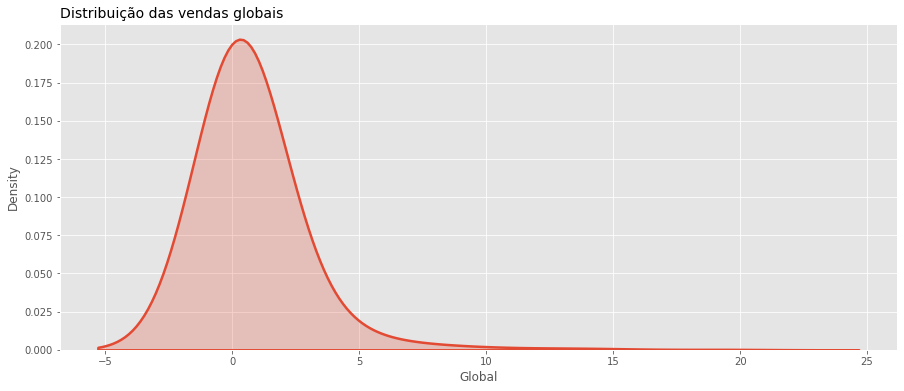

In [18]:
plt.figure(figsize=(15,6))

plt.style.use('ggplot')

plt.title('Distribuição das vendas globais', fontsize=14, loc='left')

sns.kdeplot(Base_Dados['Global'], shade=True, bw=1, linewidth=2.5);

#shade insere cor dentro do gráfico, no caso, é a parte em vermelho, tipo uma sombra
#bw=1, aproximou a img./escala, quanto maior o numero de bw, mais proximo, tipo um zoom na parte principal

#KDEPLOT, é um gráfico de densidade, visando demonstrar a concentraçao das vendas

In [19]:
Base_Dados.groupby(['Year']).sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


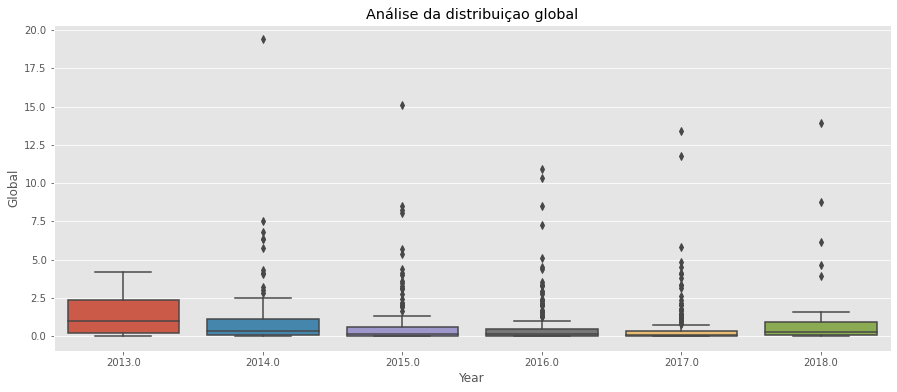

In [20]:
plt.figure(figsize=(15,6))

plt.title('Análise da distribuiçao global')

sns.boxplot(data=Base_Dados, x='Year', y='Global');

In [21]:
#descobrir quais sao os jogos mais vendidos por meio de uma linha de corte, no caso, 10
#para isso, usou o loc para executar os ogos que tiveram vendas globais acima de 10 milhoes
Base_Dados.loc[Base_Dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [22]:
Analise = Base_Dados.groupby(by=['Year']).sum().reset_index()
Analise

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


In [23]:
#A ideia é criar uma lista onde seja feito o cálculo de cada regiao por ano, e descobrir o o tamanho que cada uma tem, frente as vendas globais
#apresentou o conceito de zip, funciona parecido com o enumerate mas, vc especifica em quais colunas e dataframa sairao os valores
America = [America / Total * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]
Europa = [Europa / Total * 100 for Europa, Total in zip(Analise['Europe'], Analise['Global'])]
Japao = [Japao / Total * 100 for Japao, Total in zip(Analise['Japan'], Analise['Global'])]
Resto_Mundo = [Resto / Total * 100 for Resto, Total in zip(Analise['Rest of World'], Analise['Global'])]

America, Europa, Japao, Resto_Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

In [24]:
Analise

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


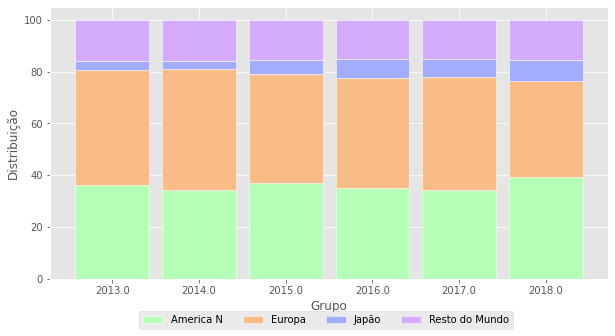

In [57]:
plt.figure(figsize=(10,5))

Largura_barra = 0.85
Rotulo = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

#plot america
plt.bar(Grupos, America, width=Largura_barra, color='#b5ffb9', edgecolor='white')

#plot europa
plt.bar(Grupos, Europa, bottom=America, width=Largura_barra, color='#f9bc86', edgecolor='white')

#plot japao
plt.bar(Grupos, Japao, bottom=[A + B for A, B in zip(America, Europa)], width=Largura_barra, color='#a3acff', edgecolor='white')

#plot resto do mundo
plt.bar(Grupos, Resto_Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao)], width=Largura_barra, color='#d3acfe', edgecolor='white')

#nomes
plt.xticks(Grupos, Rotulo)
plt.xlabel('Grupo')
plt.ylabel('Distribuição')

#colocar legenda
plt.legend(['America N', 'Europa', 'Japão', 'Resto do Mundo'], loc='upper left',bbox_to_anchor=(0.15, -0.1), ncol=4); #o loc nao deu certo "loc='upper left'"

#bbbox, cria a caixa de legenda e os numeros dentro dela, indicam o local que ficará. O -0.1, deixa a legenda embaixo, mas em uma caixa
#ncol, alinha nao em um box, mas de forma individual, conforme imagem

In [61]:
Base_Dados['Publisher'].nunique()

150

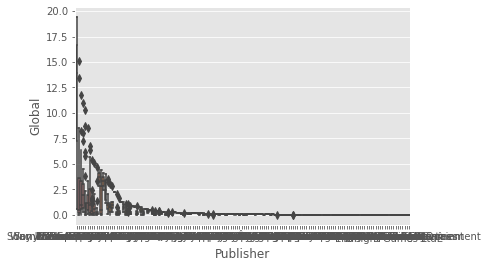

In [62]:
sns.boxplot(data=Base_Dados, x='Publisher', y='Global')

In [69]:
from sklearn.preprocessing import LabelEncoder
#labelencoder vai pegar a lista de produtora que é qualitativa e transformar em quantitativa
#ou seja, vao substituir um valor de texto em númerico

In [68]:
Funcao_label=LabelEncoder()

Base_Dados['Produtora'] = Funcao_label.fit_transform( Base_Dados['Publisher'])
Base_Dados['Genero'] = Funcao_label.fit_transform( Base_Dados['Genre'])
Base_Dados['Jogo'] = Funcao_label.fit_transform( Base_Dados['Game'])

Base_Dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtora,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


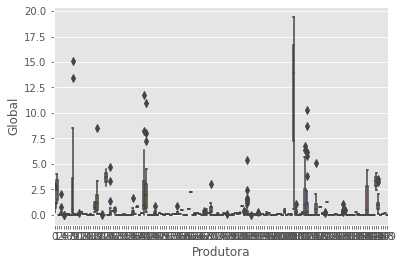

In [67]:
sns.boxplot(data=Base_Dados, x='Produtora', y='Global')

In [77]:
paleta_cores = sns.color_palette('husl', 8)
paleta_cores
#se digitar um errado, o programa as opções
#essas opções abaixo, nada mais sao que uma lista, para acessa-la basta colocar o colchete. [elemento a ser usado] [0], é o rosa

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

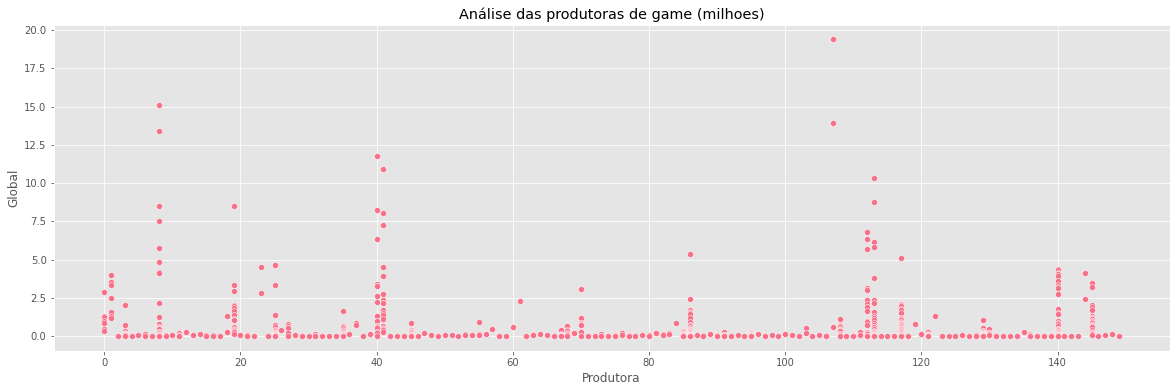

In [81]:
plt.figure(figsize=(20,6))
plt.title('Análise das produtoras de game (milhoes)')
sns.scatterplot(data=Base_Dados, x='Produtora', y='Global', color=paleta_cores[0]);

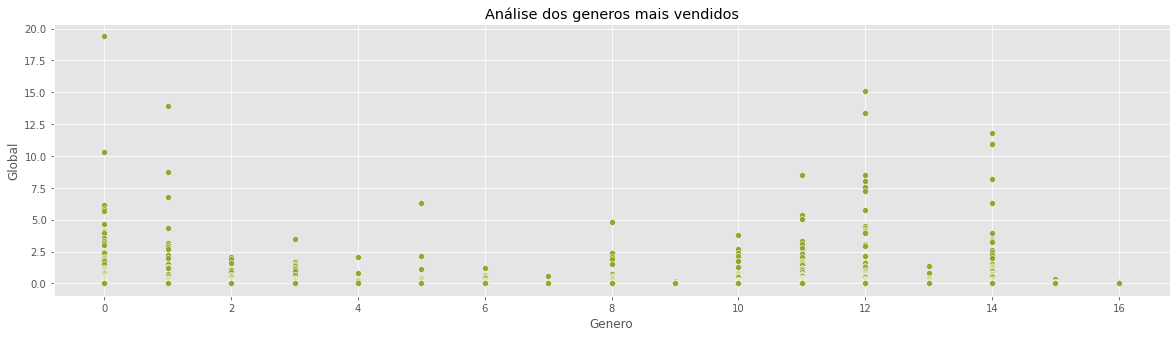

In [87]:
plt.figure(figsize=(20,5))
plt.title('Análise dos generos mais vendidos')
sns.scatterplot(data=Base_Dados, x='Genero', y='Global', color=paleta_cores[2]);

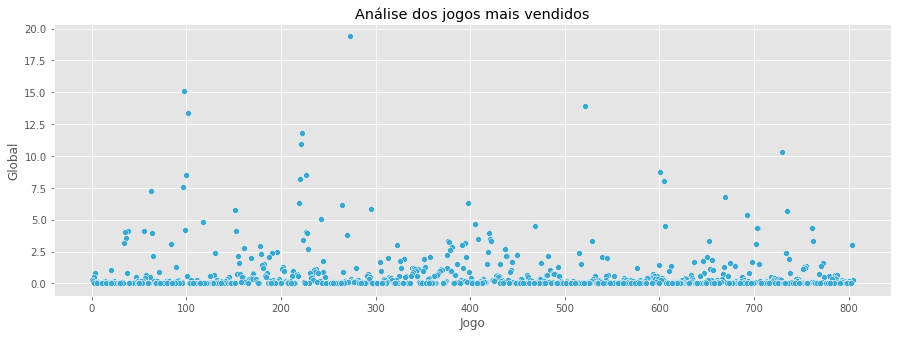

In [90]:
plt.figure(figsize=(15,5))
plt.title('Análise dos jogos mais vendidos')
sns.scatterplot(data=Base_Dados, x='Jogo', y='Global', color=paleta_cores[5]);

In [91]:
Base_Dados['Jogo'].nunique()

805